# CS 109A/AC 209A/STAT 121A Data Science: Homework 7
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 9th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW7.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Clear namespace

In [1]:
# Clear namespace
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Install package

In [2]:
#!pip install pydotplus

Import libraries

In [57]:
# Data manipulation
import numpy as np
import pandas as pd

# Ploting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Scientific computing
import scipy as sp

# Visualization
import StringIO
from IPython.display import Image
import pydotplus

# Machine Learning
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Hagmann, Tim]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

[-]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Monitoring Land Cover Changes Using Satellite Images
In the face of rapid urban development and climate change, it is now more urgent than ever for governments (and other organizations) to have a detailed, accurate and up-to-date picture of land use and land cover, as well as how the land use/cover is changing over time, in order to make effective policy decision to manage and protect natural resources. Building such a comprehensive picture of land use/cover for a large region is extremely difficult. 

Recent improvements in satellite imagery and image process have allowed for new tools in land use/cover analysis. The following is an image of the change in vegetation cover around Belize from 1975 to 2007:

<img src="sat.jpg">

In this problem, we will explore how to use classifiers to detect the presence and location of vegetation in satellite images.


### Part 1(a): Detecting vegetation in satellite images

The following files contain sampled locations from satelite aeriel images: `dataset_1.txt`, ... `dataset_4.txt`. The first two columns contain the normalized latitude and longitude values. The last column indicates whether or not the location contains vegetation, with 1 indicating the presence of vegetaion and 0 indicating otherwise. 

These small sets of labels are typically generated by hand (that is, locations might be classified based on field studies or by cross-referencing with government databases). Your task is to use the labeled locations to train a model that will predict whether a new location is vegetation or non-vegetation.

- Suppose we were asked to write a computer program to automatically identify the vegetation regions on the landscape. How can we use the model fitting algorithms you have studied so far to identify the boundaries of the vegetation regions? In particular, discuss the suitability of the following algorithms for each of the four data sets (**you do not need to evaluate your classifier, build your argument using data and decision boundary visualizations**): 
    - linear or polynomial linear regression
    - linear or polynomial logistic regression
    - linear or quadratic discriminant analysis
    - decision trees

- By a quick visual inspection of each data set, what do you think is the smallest depth decision tree that would provide a good fit of the vegetation boundaries in each case? Does `sklearn`'s decision tree fitting algorithm always provide a good fit for the proposed depth? If not, explain why. **Support your answer with suitable visualization**.

We provide you with a function `plot_tree_boundary` to visualize a decision tree model on the data set.

## Functions (necessary for the following calculations

In [4]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='darkgreen', alpha=0.6, s=40, label='vegetation', edgecolors="None")
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='black', alpha=0.6, s=40, label='non vegetation', edgecolors="None")
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

In [5]:
#--------  plot_tree_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (the classifier you want to visualize)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_tree_boundary(x, y, model, title, ax):
    # PLOT DATA
    ax.scatter(x[y==1,0], x[y==1,1], c='darkgreen', alpha=0.6, s=40, label='vegetation', edgecolors="None")
    ax.scatter(x[y==0,0], x[y==0,1], c='black', alpha=0.6, s=40, label='non vegetation', edgecolors="None")
    
    # CREATE MESH
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.grid()
    
    return ax

In [6]:
#--------  fit_and_plot_dt
# Fit decision tree with on given data set with given depth, and plot the data/model
# Input: 
#      fname (string containing file name)
#      depth (depth of tree)

def fit_and_plot_dt(x, y, depth, title, ax):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_tree_boundary(x, y, dt, title, ax)
    
    return ax

### Step 1: Load the data and explore

Let's load the four datasets and visualize the data. That is, let's plot the data points by longitude and latitude. Let's also color code the points: green if the location is vegetation and white otherwise.

In [7]:
# Load the data from satellite image #1 
sat_img_1 = pd.read_csv('datasets/dataset_1.txt', delimiter=',', header=None)

# Check out the data - sanity check
sat_img_1.head()

,0,1,2
0,0.566809,0.788130,1.0
1,0.400046,0.620933,1.0
2,0.458702,0.536935,1.0
3,0.474504,0.638224,1.0
4,0.558707,0.715527,1.0


In [8]:
# The data looks ok, so let's load the rest of the images
sat_img_2 = pd.read_csv('datasets/dataset_2.txt', delimiter=',', header=None)
sat_img_3 = pd.read_csv('datasets/dataset_3.txt', delimiter=',', header=None)
sat_img_4 = pd.read_csv('datasets/dataset_4.txt', delimiter=',', header=None)

# Make a list of the four dataframes so we can iterate through them later
sat_images = [sat_img_1, sat_img_2, sat_img_3, sat_img_4]

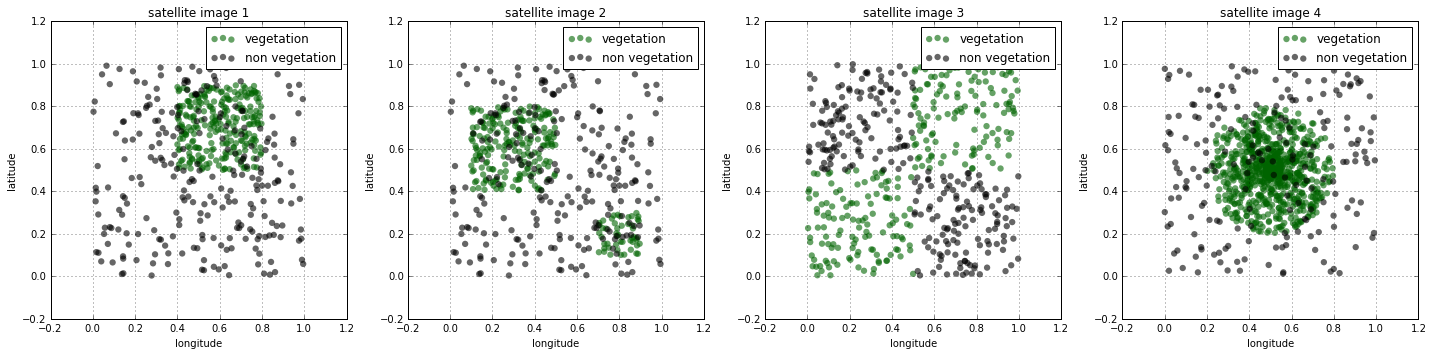

In [9]:
# Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Iterate through the four images/dataframes
for i in range(4):
    # Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    # Get the class labels
    y = sat_images[i].values[:, -1]
    
    # Plot vegetation locations as green dots
    ax[i].scatter(x[y == 1, 0], x[y == 1, 1], c='darkgreen', alpha=0.6, s=40, label='vegetation', edgecolors="None")
    # Plot non-vegetation locations as white dots
    ax[i].scatter(x[y == 0, 0], x[y == 0, 1], c='black', alpha=0.6, s=40, label='non vegetation', edgecolors="None")
    
    # Label everything
    ax[i].set_xlabel('longitude')
    ax[i].set_ylabel('latitude')
    ax[i].set_title('satellite image {}'.format(i + 1))
    ax[i].legend()
    ax[i].grid()

plt.tight_layout()
plt.show() 

For each image, based on the sample of we want to train a classifier that will classify a location as vegetation or non-vegetation.

Since the vegetation seem to be clustered in isolated regions in each image. Classifying locations with vegetation involves learning a boundary around each region. We then classify the points inside this region as vegetation and points outside as non-vegetation.

Formally speaking, the vegetation regions in an image can be identified by treating the latitude and longitude values as predictors and the vegetation information as a binary response, and fitting a classification model. The decision boundaries of these classifiers then allow us to identify the vegetation regions.

### Step 2: Classify locations with vegetation

How can we use the models we have studied so far to identify the boundaries of the vegetation regions? 

Let's consider:

    1. linear or polynomial logistic regression
    2. linear or quadratic discriminant analysis
    3. decision trees

#### Question 1:
Looking at the data, can you intuitively tell which model will perform best on which data set?

#### Answer 1:
- **DF 1:** A good decision boundary for the cluster would be a square, that means, that a method that is able to produce rectangles as its decision boundaries is going to perform the best. A method that is able to this are the family of  classification trees. 
- **DF 2:** There are two clusters in a square shaped form, with the same reasoning as above, a classification tree might perform the best.
- **DF 3:** With the same reasoning the decision tere should perform very well on the data. 
- **DF 4:** The decision boundary is a circle wich means that a polynomial logistic regression or a QDA should perform very well. 

#### Question 2:
What do you think is the smallest depth decision tree that would provide a good fit of the vegetation boundaries in each case?
#### Answer 2:
- **DF 1:** A tree with the depth of four should do the trick. There are four edges to cover. 
- **DF 2:** I would guess of 8 or slightly below 8.  
- **DF 3:** A depth of 4 should be sufficiant. 
- **DF 4:** Because of the rectangular descion boundaries of trees a very large number of splits are nesessary. My guess would be arround 15+. 

#### Linear logistic regression with lamda (c=1'000'000) --> No regularization

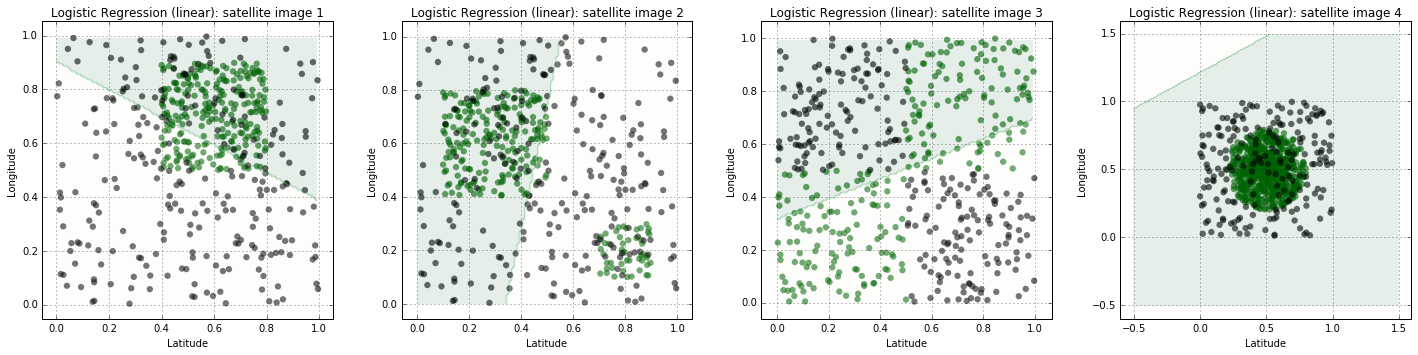

In [10]:
# Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Create a logistic regression model with linear boundary
np.random.seed(123) # Set random seed
logreg = linear_model.LogisticRegression(C=1000000)

# Iterate through the four images/dataframes
for i in range(4):
    # Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    # Get the class labels
    y = sat_images[i].values[:, -1]    
    
    # Fit our logistic regression model
    logreg.fit(x, y)
    
    # Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 3:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    # Plot the data along with the decision boundary learned by our model
    ax[i] = plot_decision_boundary(x, y, logreg, 
                                   'Logistic Regression (linear): satellite image {}'.format(i + 1), 
                                   ax[i], bounds)
    ax[i].grid()    

plt.tight_layout()
plt.show()

#### Polinomial logistic regression with lamda (c=1'000'000) --> No regularization

[[-19.50055616  55.91712532  71.55150986 -57.24851099  18.98698705
  -58.38296017]]
[[ -7.2650532   26.5708788   41.99911503 -13.02731188 -35.11273308
  -26.74273522]]
[[  250.33015399 -1000.11678659 -1003.06259068     4.69227591
   1995.20829885     4.46298734]]
[[ -8.68797958  47.14766547  41.92751815 -47.47130911   0.70758635
  -43.6331506 ]]


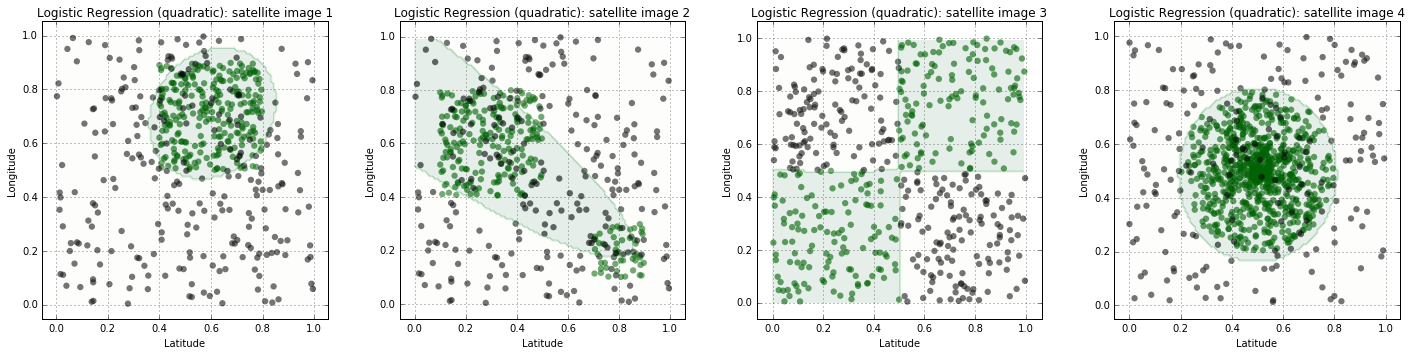

In [11]:
# Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Logistic Regression with Quadratic Terms
np.random.seed(123) # Set random seed
logreg_poly = linear_model.LogisticRegression(C=1000000)

# Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Expand our predictor array with quadratic terms
    quad_features = preprocessing.PolynomialFeatures(degree = 2)
    x_expanded = quad_features.fit_transform(x)
    
    #Fit logistic regression model with quadratic decision boundary
    logreg_poly.fit(x_expanded, y)
    print logreg_poly.coef_
    
    #Plot the data along with the decision boundary learned by our model
    ax[i] = plot_decision_boundary(x, y, logreg_poly, 'Logistic Regression (quadratic): satellite image {}'.format(i + 1), ax[i], poly_flag=True)
    ax[i].grid()

plt.tight_layout()
plt.show()

#### Linear discrimant analysis (LDA)

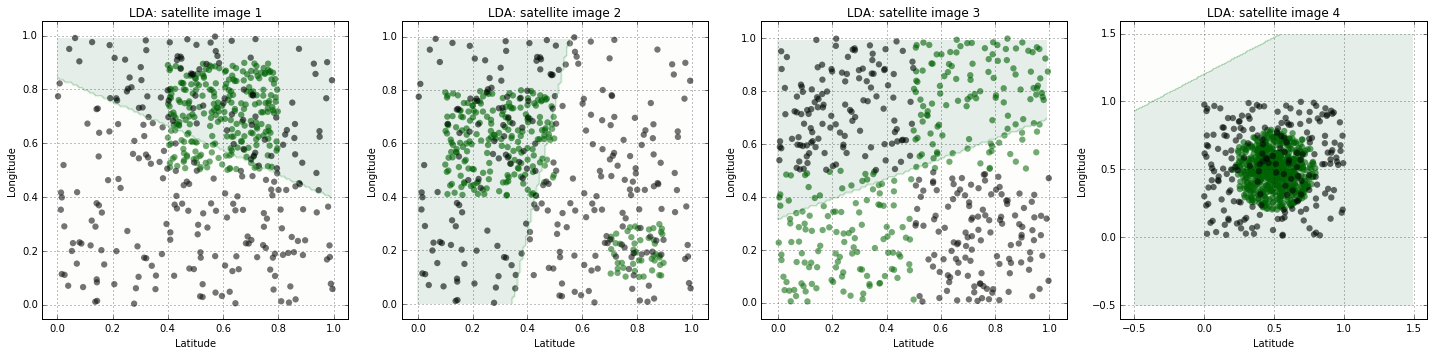

In [12]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# LDA
lda = discriminant_analysis.LinearDiscriminantAnalysis()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Fit our LDA model
    lda.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 3:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
        
    #Plot the data along with the decision boundary learned by our model    
    ax[i] = plot_decision_boundary(x, y, lda, 'LDA: satellite image {}'.format(i + 1), ax[i], bounds)
    ax[i].grid()

plt.tight_layout()
plt.show()

#### Quadratic discrimant analysis (QDA)

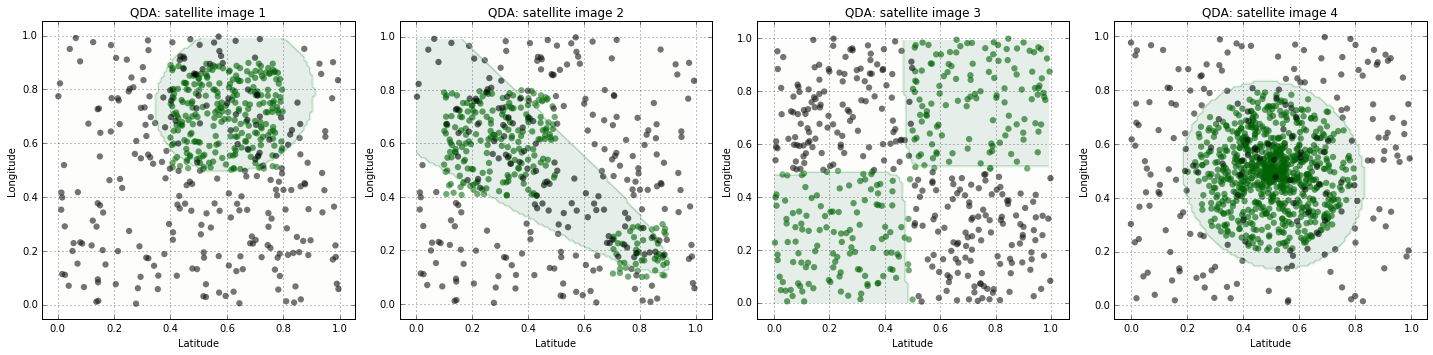

In [13]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Logistic Regression with Quadratic Terms
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Fit our QDA model
    qda.fit(x, y)
        
    #Plot the data along with the decision boundary learned by our model 
    ax[i] = plot_decision_boundary(x, y, qda, 'QDA: satellite image {}'.format(i + 1), ax[i])
    ax[i].grid()

plt.tight_layout()
plt.show()

- **Linear logistic regression / LDA:** Given that the vegetation regions are rectangular or elliptical in shape, a linear classification is not well-suited.

- **Quadratic logistic regression / QDA:** These methods will be able to accurately detect the vegetation regions in `dataset_4`, but will not be good fits the other data sets.

- **Decision trees:** This method will provide good fits for the first three data sets, where the region boundaries are rectangular. A decision tree is not best suited `dataset_4`, as to get a good fit, the tree depth needs to be very large. 

#### Decision Tree: Image 1

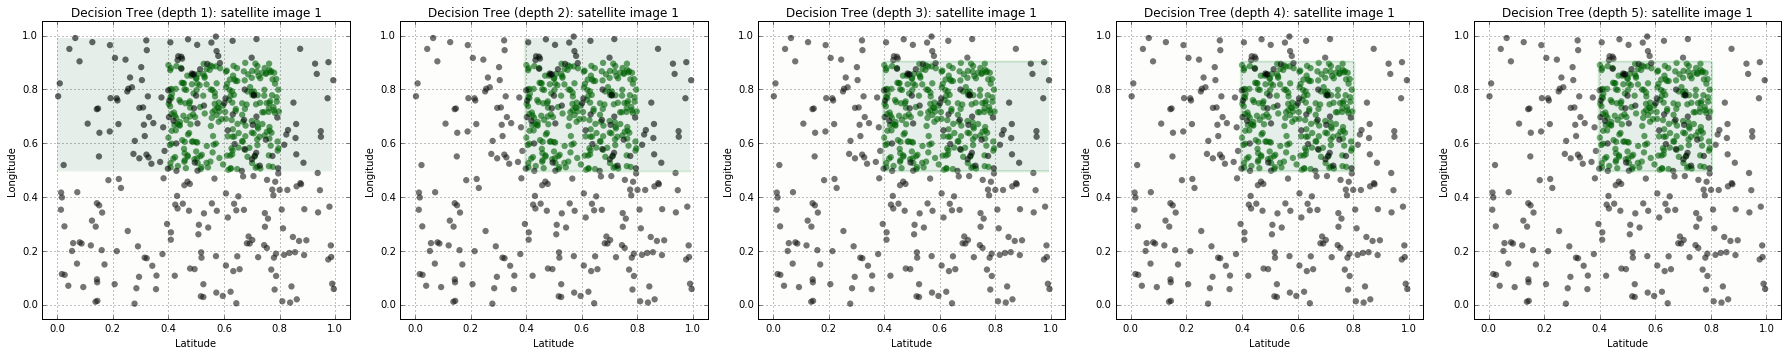

In [14]:
# Plot for dataset_1.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))
#Get the long/lat coords
x = sat_images[0].values[:, :-1]
#Get the class labels
y = sat_images[0].values[:, -1]

# Set an index for the subplots
ind = 0
# Iterate through various depths
for i in range(1, 6):
    #Plot data and decision boundary for decision tree model
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 1'.format(i), ax[ind]) 
    #Increment subplot index
    ind += 1

plt.tight_layout()
plt.show()

#### Decision Tree: Image 2

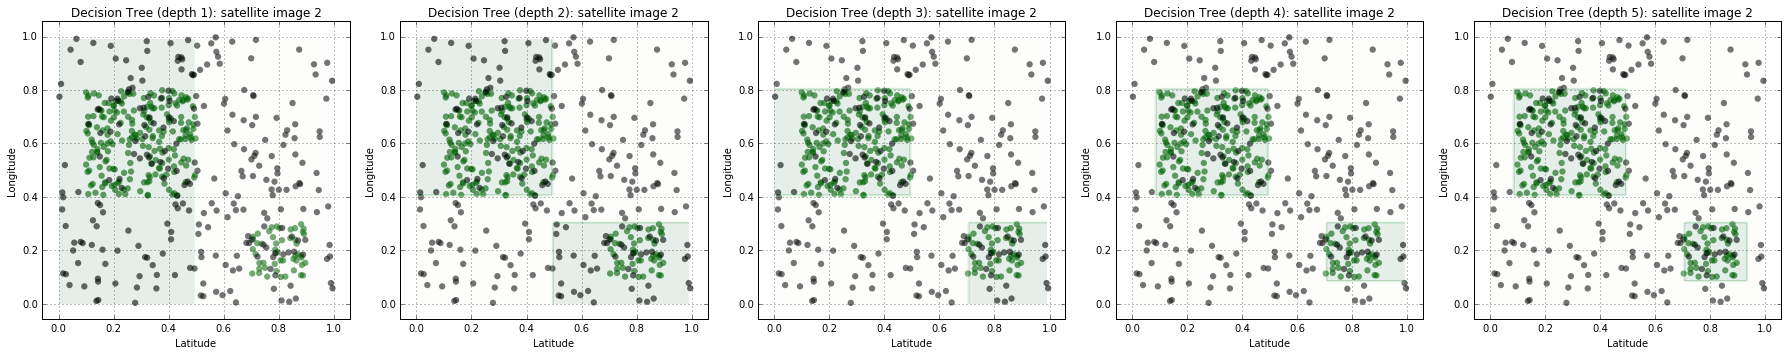

In [15]:
# Plot for dataset_2.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))

# Get the long/lat coords
x = sat_images[1].values[:, :-1]
# Get the class labels
y = sat_images[1].values[:, -1]

# Set an index for the subplots
ind = 0
# Iterate through various depths
for i in range(1, 6):
    #Plot data and decision boundary for decision tree model
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 2'.format(i), ax[ind]) 
    #Increment subplot index
    ind += 1

plt.tight_layout()
plt.show()

#### Decision Tree: Image 3

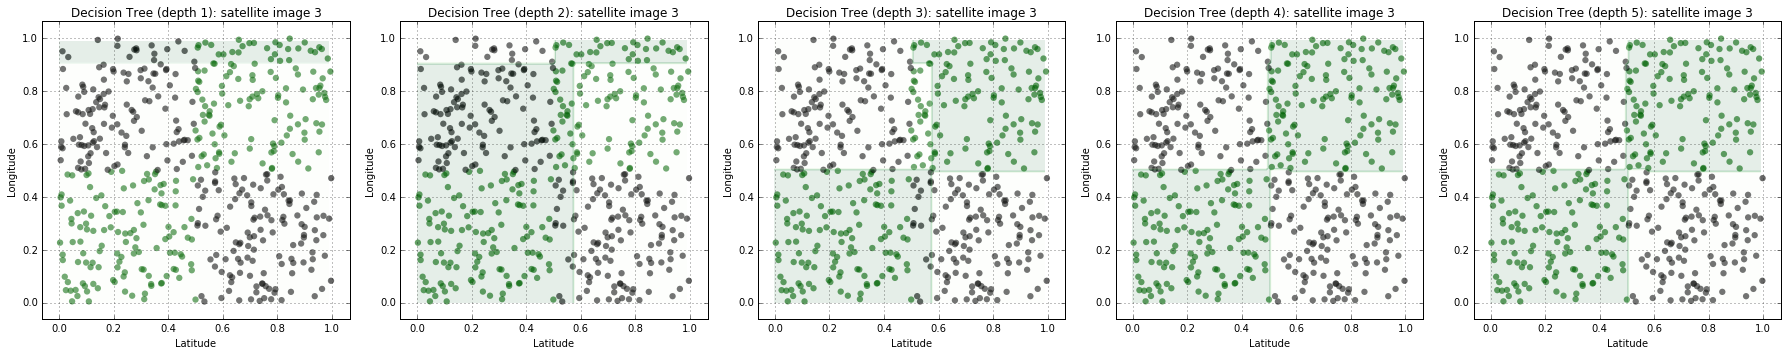

In [16]:
# Plot for dataset_3.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))

#Get the long/lat coords
x = sat_images[2].values[:, :-1]
#Get the class labels
y = sat_images[2].values[:, -1]

#Set an index for the subplots
ind = 0
#Iterate through various depths
for i in range(1, 6):
    #Plot data and decision boundary for decision tree model
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 3'.format(i), ax[ind]) 
    #Increment subplot index
    ind += 1

plt.tight_layout()
plt.show()

Since the vegetation region in dataset 1 takes the shape of a rectangle, a decision tree with a minimum depth of 4 is needed to define this region: one to check each of left x-limit, right x-limit, lower y-limit and upper y-limit. 

The vegetation in dataset 2 spans two rectangles of different sizes, a naive guess would be that we need a decision tree of depth 8, one for each corner of the two rectangles. However it suffices to use a simpler **5-level** tree: each rectangle can be captured by a decision tree of depth 4, and the root node branches to one of these trees.

Since the vegetation region in dataset 1 takes the shape of two rectangles lined up along their diagonals.  A depth 2 decision tree would have sufficed for this data set. However, due to the **greedy nature** of the fitting algorithm, we needed to go up to depth 4 to get a good fit. This is due to a sub-optimal local choice at higher depths.

#### Decision Tree: Image 4

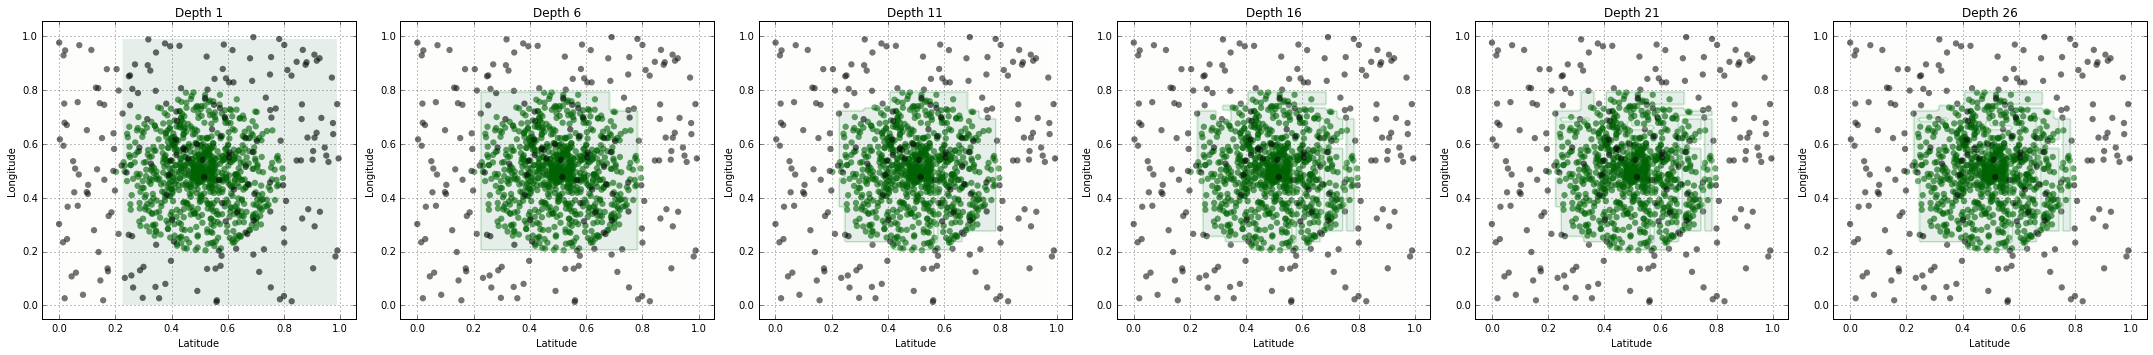

In [17]:
# Plot for dataset_4.txt: depths 1 through 26
fig, ax = plt.subplots(1, len(range(1, 27, 5)), figsize=(30, 5))

# Get the long/lat coords
x = sat_images[3].values[:, :-1]
# Get the class labels
y = sat_images[3].values[:, -1]

# Set an index for the subplots
ind = 0
# Iterate through various depths
for i in range(1, 27, 5):
    #Plot data and decision boundary for decision tree model
    ax[ind] = fit_and_plot_dt(x, y, i, 'Depth {}'.format(i), ax[ind]) 
    #Increment subplot index
    ind += 1
    
plt.tight_layout()
plt.show()

Since the vegetation is circular in shape, a decision tree with infinite depth is required to fit this data set.

**Conclusion:** What's our final word then? Which model is better for detecting vegetation in satellite images? In your answer, think about the adaptability and flexibility of each model as well as the computational efficiency.

### Part 1(b). What is the best splitting criterion for decision trees?
Suppose you are given a data set with 100 points in a satellite image, of which 51 are class 1 and 49 are class 0. Consider following two candidate splits for constructing a decision tree: 
1. [Part 1 = (Class 1: 11, Class 0: 37), Part 2 = (Class 1: 40, Class 0: 12)]
2. [Part 1 = (Class 1: 25, Class 0: 48), Part 2 (Class 1: 26, Class 0: 1)]

Which of these is a better split according classification error, Gini coefficient, and Entropy criteria? Do the three criteria agree on the best split, or is one better than the other? Support your answer with a concrete explanation.

### Step 3: Evaluate our modeling choices

Recall that when creating our decision tree, we can decide on a split according classification error, Gini coefficient, and Entropy criteria. Which criterion is better, i.e. yield a better model? Or perhaps all three criteria will always produce the same splits?

Let's explore these three criteria using a simple example.

Suppose you are given a data set with 100 points in a satellite image, of which 51 are class 1 and 49 are class 0. Consider following two candidate splits for constructing a decision tree: 
1. $((11,37), (40,12))$  
2. $((25,48), (26,1))$

In [18]:
# Calculate classification accuracy for a binary split
def err(x1, x2):
    return min((x1,x2))

# Calculate Gini coefficient for a binary split
def Gini(x1, x2):
    return x1*(1-x1) + x2*(1-x2)

# Calculate Cross-entropy for a binary split
def entropy(x1, x2):
    return -x1*np.log(x1) - x2*np.log(x2)

In [19]:
# Split 1:

# Compute split counts
n11 = 48
n12 = 52
n1 = n11 + n12

# Compute split probabilities
x1 = 11./n11
x2 = 37./n11
y1 = 40./n12
y2 = 12./n12

print('Split 1')
print('Error = ' + str((n11*err(x1,x2)+n12*err(y1,y2))/n1))
print('Gini = ' + str((n11*Gini(x1,x2)+n12*Gini(y1,y2))/n1))
print('Entropy = ' + str((n11*entropy(x1,x2)+n12*entropy(y1,y2))/n1))

print('')

# Compute split counts
n21 = 73
n22 = 27
n2 = n21 + n22

# Split 2:
x1 = 25./n21
x2 = 48./n21
y1 = 26./n22
y2 = 1./n22

print('Split 2')
print('Error = ' + str((n21*err(x1,x2)+n22*err(y1,y2))/n2))
print('Gini = ' + str((n21*Gini(x1,x2)+n22*Gini(y1,y2))/n2))
print('Entropy = ' + str((n21*entropy(x1,x2)+n22*entropy(y1,y2))/n2))

Split 1
Error = 0.23
Gini = 0.354198717949
Entropy = 0.539274531592

Split 2
Error = 0.26
Gini = 0.348026382547
Entropy = 0.511910804521


**Observation:** 
While Split 1 has lower error, Split 2 is better, as the partitions are *purer* - the right-hand partition contains an almost perfect classification.

Gini coefficient and Cross-entropy choose Split 2 over Split 1, showing that they promote purer splits. This shows that these are better criteria than error.

What is the default criterion `sklearn` uses in its decision tree classifier model? Will changing this criterion make any difference in terms of the preformance of our classifier on the satellite images?

## Problem 2: Loan Risk Assessment
In this problem, you are asked by an Unamed National Bank to build a risk assessment model that predicts whether or not it is risky to give a loan to an applicant based on the information provided in their application. Traditionally, loan applications are processed and assessed by hand, but now the bank wants to move to an automated loan processing system. That is, the bank will provide you with loan applications that it has processed in the past for you to build a classifier for risk assessment, going forward, the bank will reject the loan applications from applicants labeled risky and approve the applications that are labeled safe by your model.

The relevant training and test sets are provided in the files: `dataset_5_train.txt` and `dataset_5.test.txt`. The training and testing sets are created from both approved and rejected loan applications that the bank has processed by hand in the past. The first 24 columns contain attributes for each applicant gathered from their application, and the last column contains the credit risk assessment with 1 indicating that the customer is a loan risk, and 0 indicating that the customer is not a loan risk. The names of the attributes are provided in the file `dataset_5_description.txt`.


### Part 2(a): A simple decision tree model
- Fit a simple decision tree of depth 2 to the training set and report its accuracy on the test set. 


### Functions (necessary for the following calculations)

In [20]:
#--------  display_dt
# Print decision tree model 'model', already fitted
# Input: 
#      model     (Decision tree model)
# Returns: 
#      None

def display_dt(model):
    dummy_io = StringIO.StringIO() 
    tree.export_graphviz(dt, out_file = dummy_io) 
    print dummy_io.getvalue()

In [21]:
#--------  print_tree
# This function creates images of tree models using pydotplus
# Input: 
#      estimator   (Decision tree model)
#      features    (Decision tree features)
#      class_names (Names of the classes)
# Returns: 
#      graph     (Decision tree graph )
# Source:
#      https://github.com/JWarmenhoven/ISLR-python

import StringIO
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO.StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, proportion=True, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)


### Step 1: Importing Data

In [23]:
# Load data
df_train = pd.read_csv('datasets/dataset_5_train.txt', header=None)
df_test = pd.read_csv('datasets/dataset_5_test.txt', header=None)

# Code header names (From the dataset_5_description.txt)
header_names = ["census_code", "credit_amount", "sex_id", "education_id", "martial_status_id", "age",
                "delay_sep_05", "delay_aug_05", "delay_jul_05", "delay_jun_05", "delay_05", "delay_apr_05",
                "owed_sep_05", "owed_aug_05", "owed_jul_05", "owed_jun_05", "owed_mai_05", "owed_apr_05",
                "paid_sep_05", "paid_aug_05", "paid_jul_05", "paid_jun_05", "paid_mai_05", "paid_apr_05",
                "credit_risk"]

# Add header names
df_train.columns = header_names
df_test.columns = header_names

# integer variables
int_var = ["census_code", "sex_id", "education_id", "martial_status_id",
           "credit_risk"]

# Tranform to integers
df_train[int_var] = df_train[int_var].astype(int)
df_test[int_var] = df_test[int_var].astype(int)

# categorical variables
#cat_var = ["census_code", "sex_id", "education_id", "martial_status_id",
#           "credit_risk_id"]
cat_var = ["census_code"]

# Tranform to strings
for i in cat_var:
    df_train[["census_code"]] = df_train[["census_code"]].astype(str)
    df_test[["census_code"]] = df_test[["census_code"]].astype(str)

### Step 2: First look at the data

In [24]:
print 'Shape of training data: ', df_train.shape
print 'Shape of the test data:',  df_test.shape

print "\nFirst 5 entries of the overall dataframe:"
df_train[0:5]

Shape of training data:  (250, 25)
Shape of the test data: (9750, 25)

First 5 entries of the overall dataframe:


,census_code,credit_amount,sex_id,education_id,martial_status_id,age,delay_sep_05,delay_aug_05,delay_jul_05,delay_jun_05,...,owed_jun_05,owed_mai_05,owed_apr_05,paid_sep_05,paid_aug_05,paid_jul_05,paid_jun_05,paid_mai_05,paid_apr_05,credit_risk
0,3288,20000.0,2,1,2,39.0,0.0,0.0,0.0,0.0,...,19308.0,19498.0,0.0,1588.0,1770.0,1200.0,390.0,0.0,44334.0,1
1,3001,50000.0,1,2,2,27.0,2.0,2.0,0.0,0.0,...,7382.0,1975.0,50514.0,4146.0,1200.0,0.0,0.0,49800.0,0.0,1
2,3288,80000.0,1,2,2,27.0,1.0,2.0,2.0,2.0,...,68531.0,69808.0,70544.0,5000.0,3100.0,2000.0,3000.0,2000.0,4000.0,1
3,3652,70000.0,2,2,2,22.0,0.0,0.0,0.0,0.0,...,69316.0,29083.0,28140.0,3200.0,3600.0,3075.0,1204.0,1200.0,1046.0,0
4,3817,200000.0,1,1,2,24.0,-1.0,-1.0,-1.0,-1.0,...,18154.0,13677.0,2018.0,200.0,198.0,18156.0,0.0,1150.0,0.0,0


The data consists of a credit risk dataframe with 25 variables. All variables are coded numerically. The training data is with only 250 observations much smaller than the test data. This is rather unusual. However, it might be a requirement from the bank to only use this sample to build the model. Otherwise it would be preferable to use more data from the test set.

In [25]:
print "Training: Unique categorical values"
for i in int_var:
    print i, ":", np.unique(df_train[i].values)

print "\nTest: Unique categorical values"
for i in int_var:
    print i, ":", np.unique(df_test[i].values)

Training: Unique categorical values
census_code : ['3001' '3123' '3288' '3298' '3420' '3530' '3540' '3585' '3652' '3662'
 '3817' '3827']
sex_id : [1 2]
education_id : [1 2 3 4 6]
martial_status_id : [1 2 3]
credit_risk : [0 1]

Test: Unique categorical values
census_code : ['3001' '3123' '3288' '3298' '3381' '3420' '3530' '3540' '3585' '3652'
 '3662' '3817' '3827']
sex_id : [1 2]
education_id : [0 1 2 3 4 5 6]
martial_status_id : [0 1 2 3]
credit_risk : [0 1]


Looking at the individual categorical data shows, that there appear to be mistakes in the dataset. Some variables are wrongly coded or they only appears in the test set. Before building a model this has to be corrected.

### Step 3: Data cleanup

In [26]:
# Clean-up: recode to others
df_train.loc[df_train['education_id'].isin([5, 6]), 'education_id'] = 4
df_train.loc[df_train['martial_status_id'].isin([0]), 'martial_status_id'] = 3

df_test.loc[df_test['education_id'].isin([5, 6]), 'education_id'] = 4
df_test.loc[df_test['martial_status_id'].isin([0]), 'martial_status_id'] = 3

# Remove one wrongly coded outlier from the test set
df_test = df_test.loc[~df_test['census_code'].isin(['3381']), ]


As seen before, the data is only coded numericaly. However, because we wanna use sklearn this poses a problem because sklearn would assume that all the variables are numerical and ordered. In order to solve this problem a couple of helper dataframes for the categorical variables are created.

In [27]:
# Create sex data frame with the corpesonding labels
df_sex = pd.DataFrame({'sex_id': [1, 2],
                       'sex': ['male', 'female']})

# Create education data frame with the corpesonding labels
df_edu = pd.DataFrame({'education_id': [1, 2, 3, 4],
                       'education': ['graduate school', 'university', 'high school', 'others']})

# Create martial status data frame with the corpesonding labels
df_mar = pd.DataFrame({'martial_status_id': [1, 2, 3],
                       'martial_status': ['married', 'single', 'others']})


We're now joining the data together in order to add the correct categories to the dataframe.

In [28]:
# Left join
df_train = pd.merge(df_train, df_sex, how='left', on=['sex_id'])
df_train = pd.merge(df_train, df_edu, how='left', on=['education_id'])
df_train = pd.merge(df_train, df_mar, how='left', on=['martial_status_id'])

# Drop id variables
df_train = df_train.drop(['sex_id', "education_id", "martial_status_id"], axis=1)

# Left join
df_test = pd.merge(df_test, df_sex, how='left', on=['sex_id'])
df_test = pd.merge(df_test, df_edu, how='left', on=['education_id'])
df_test = pd.merge(df_test, df_mar, how='left', on=['martial_status_id'])

# Drop id variables
df_test = df_test.drop(['sex_id', "education_id", "martial_status_id"], axis=1)

In [29]:
print "First five observations of the new dataframe: "
df_train[0:5]

First five observations of the new dataframe: 


,census_code,credit_amount,age,delay_sep_05,delay_aug_05,delay_jul_05,delay_jun_05,delay_05,delay_apr_05,owed_sep_05,...,paid_sep_05,paid_aug_05,paid_jul_05,paid_jun_05,paid_mai_05,paid_apr_05,credit_risk,sex,education,martial_status
0,3288,20000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,16690.0,...,1588.0,1770.0,1200.0,390.0,0.0,44334.0,1,female,graduate school,single
1,3001,50000.0,27.0,2.0,2.0,0.0,0.0,0.0,0.0,23901.0,...,4146.0,1200.0,0.0,0.0,49800.0,0.0,1,male,university,single
2,3288,80000.0,27.0,1.0,2.0,2.0,2.0,2.0,2.0,63467.0,...,5000.0,3100.0,2000.0,3000.0,2000.0,4000.0,1,male,university,single
3,3652,70000.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,68969.0,...,3200.0,3600.0,3075.0,1204.0,1200.0,1046.0,0,female,university,single
4,3817,200000.0,24.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,9167.0,...,200.0,198.0,18156.0,0.0,1150.0,0.0,0,male,graduate school,single


As discussed above, we wanna use the decision tree implementation of sklearn. Even tought we have now proper categorical variables we still have to code them back in to numerical features.
That means we have to turn the categorical data into multiple binary features, i.e., one-hot-encoding. 

In [30]:
# Get dummy variables
df_train_dummies = pd.get_dummies(df_train)
df_test_dummies = pd.get_dummies(df_test)


In [31]:
# Shapes
print "Shape of the training dataframe:", df_train_dummies.shape
print "Shape of the test dataframe:", df_test_dummies.shape

Shape of the training dataframe: (250, 42)
Shape of the test dataframe: (9749, 42)


### Step 4: Prepare data for modelling

The next step is to extract the relevant variables for the modelling process.

In [32]:
# Prepare train data
y_train = df_train_dummies.loc[:, "credit_risk"].values
x_train = df_train_dummies.drop(['credit_risk'], axis=1).values

# Prepare test data
y_test = df_test_dummies.loc[:, "credit_risk"].values
x_test = df_test_dummies.drop(['credit_risk'], axis=1).values

# Get column names
x_names = df_train_dummies.drop(['credit_risk'], axis=1).columns.values

Befor we can start modelling we have to look at the proportions of the classes. If there is a class imbalance this has to be dealt with.

#### Proportions

In [33]:
print "Training | Proportion of people at risk vs safe:"
print pd.value_counts(y_train) / len(y_train) * 100

print "\nTest | Proportion of people at risk vs safe:"
print pd.value_counts(y_test) / len(y_test) * 100

Training | Proportion of people at risk vs safe:
1    51.2
0    48.8
dtype: float64

Test | Proportion of people at risk vs safe:
1    50.158991
0    49.841009
dtype: float64


The proportions in the test as well as the training set are roughly 50/50. That means we don't have to adjust the data according to class imbalances.

### Step 5: Modelling

The next step is to start modelling.

In [34]:
# Build the tree
ct_1 = tree.DecisionTreeClassifier(max_depth=2, criterion='gini')

# Fit the tree
ct_fit_1 = ct_1.fit(x_train, y_train)

# Evaluate accuracy
training_accuracy = ct_fit_1.score(x_train, y_train)
test_accuracy = ct_fit_1.score(x_test, y_test)

print "Accuracy on training data: %0.2f" % (training_accuracy * 100), "%"
print "Accuracy on test data:     %0.2f" % (test_accuracy * 100), "%"
print "Confusion matrix: \n", confusion_matrix(y_test, ct_fit_1.predict(x_test))

Accuracy on training data: 79.20 %
Accuracy on test data:     75.88 %
Confusion matrix: 
[[4565  294]
 [2057 2833]]


### Step 6: Visualization

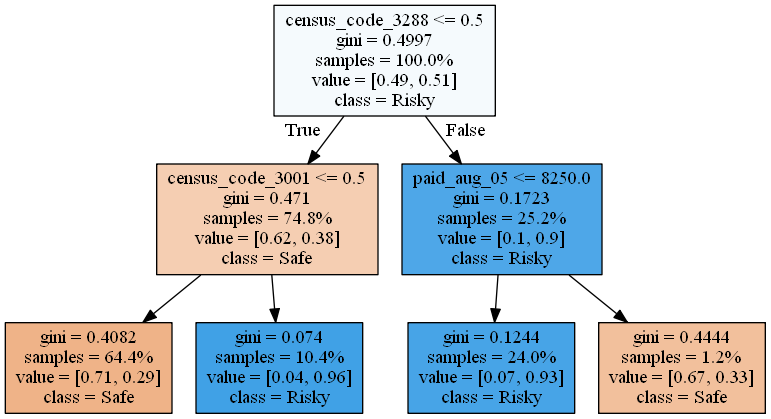

In [35]:
graph1 = print_tree(ct_fit_1, features=x_names, class_names=['Safe', 'Risky'])
Image(graph1.create_png())

- Interpret the way your model performs risk classifcation. Would you recommend this classifier to Unamed National Bank for making decisions on the loan applications of **real people**? If yes, make an argument for the merrits of this classifer. If no, then make necessary changes to the data set and fit a new classifier that you believe is fair to use in practice, then compare the two classifiers.

### Step 7: Interpretation

For only having a depth of two the model performs quite well. This can be seen by the high accuracy number of 76%. It can be assumed that the tree probably could perform even better when having the option to grow deeper. Having only so few option to split, makes it hard for the tree to perform well. The tree uses the "amount paid in august" and some census information. However, the latter is rather bothersome! The census code 3'288 controls for predominantly whites and the 3'001 are belonging to asian descent. This can be seen from the following table:

In [36]:
# Extraction of the census information
df_census_info = pd.read_csv('datasets/dataset_5_demographic_information_in_percentage.txt', sep="\t")
df_census_info

,Census code,Male,Female,Caucasian,African American,Asian,Hispanic/Latino,Other race
0,3001,51.5,48.5,21.6,3.5,46.1,18.4,10.4
1,3123,51.3,48.7,40.6,0.8,15.5,34.2,9.0
2,3288,50.2,49.8,53.6,2.2,19.1,14.6,10.5
3,3298,50.6,49.4,92.1,4.2,1.1,2.1,0.4
4,3420,51.7,48.3,91.7,3.5,2.4,2.3,0.1
5,3530,50.8,49.2,88.7,4.5,1.7,4.1,1.1
6,3540,51.5,48.5,89.3,2.6,5.4,0.7,1.9
7,3585,48.8,51.2,28.0,52.2,6.7,11.8,1.3
8,3652,48.5,51.5,31.9,24.9,8.6,30.6,3.9
9,3662,52.4,47.6,86.8,3.4,2.6,5.9,1.3


The Census information shows, that the census information is heavily influenced by the ethnic origin of the loan holder. That means for example that more than half of the people in the census 3'585 are of african american decent while there are less than 1% in the census area 3'123. Census code therefore controls for ethnic origins.

The above model classifies the census code 3'001 (whites or asians) automaticaly as safe (orange). People who are neither white nor asian are automaticly classified as risky (blue). If a person is white and has paid more than 8'250$ in August, the person is classified as safe (1.2% of all people). If not, the person is also classified as risky. 

Using gender or ethnicity can be considert as unethical because people are not able to choose there gender or there heritage. That is for example why banks and insurance companies are not allowed to use variables like these in the European Union to build their risk models. That is why those two variables are excluded from the next model.

### Step 8: New model

For the new model we're dropping the unethical variables.

In [37]:
# Variables to drop
drop_var = ['census_code_3001', 'census_code_3123', 'census_code_3288',
            'census_code_3298', 'census_code_3420', 'census_code_3530',
            'census_code_3540', 'census_code_3585', 'census_code_3652',
            'census_code_3662', 'census_code_3817', 'census_code_3827',
            'sex_female', 'sex_male', 'credit_risk']

# New training and testing data
x_train = df_train_dummies.drop(drop_var, axis=1).values
x_test = df_test_dummies.drop(drop_var, axis=1).values

# Get column names
x_names = df_train_dummies.drop(drop_var, axis=1).columns.values

With the new x variables we're now building a new model.

In [38]:
# Build the tree
ct_2 = tree.DecisionTreeClassifier(max_depth=2, criterion='gini')

# Fit the tree
ct_fit_2 = ct_2.fit(x_train, y_train)

# Evaluate accuracy
training_accuracy = ct_fit_2.score(x_train, y_train)
test_accuracy = ct_fit_2.score(x_test, y_test)

print "Accuracy on training data: %0.2f" % (training_accuracy * 100), "%"
print "Accuracy on test data:     %0.2f" % (test_accuracy * 100), "%"
print "Confusion matrix: \n", confusion_matrix(y_test, ct_fit_2.predict(x_test))

Accuracy on training data: 69.20 %
Accuracy on test data:     60.43 %
Confusion matrix: 
[[1646 3213]
 [ 645 4245]]


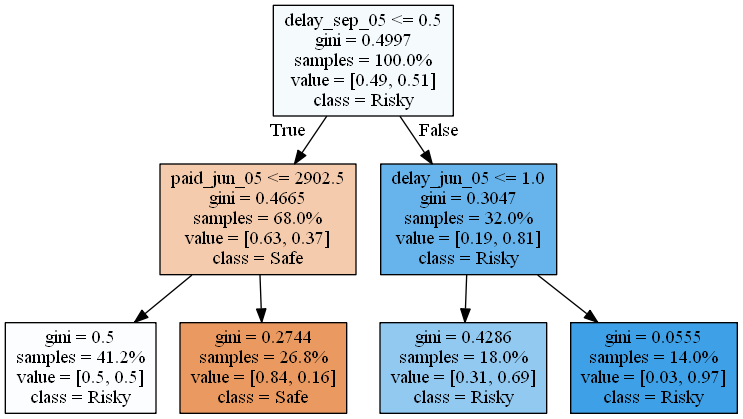

In [39]:
graph2 = print_tree(ct_fit_2, features=x_names, class_names=['Safe', 'Risky'])
Image(graph2.create_png())

### Interpretation:

The new model uses the variable "delayed payment in September" as the first split point. If a person has delayed payment in September, the person is classified as risky no matter what. Otherwhise, if the person has no delayed payments in September and has paid more than 2'902.5 in June the person is considered as safe, otherwise risky. 

The nice thing about the new model is, that the new factors are only dependent on an individual's borrowing and repayment history rather than their heritage or gender. However, the accuracy of the model is with only 60% lower than with the inclusion of the two unethical variables.

### Part 2(b): An ensemble of decision trees

- One way to improve the prediciton accuracy for this task is to use an ensemble of decision trees fitted on random samples, as follows: given a training set of size $n$, sample new training sets uniformly with replacement, and fit a decision tree model on each random sample.

  Now, how would you combine the ensemble into a single classifier? There are at lease two ways:

   - *Random classifier*: predict using a randomly chosen decision tree from the ensemble
   - *Majority classifier*: predict using the majority vote from decision trees in the ensemble
   
   

- We can also fit a *Random Forest* model for our data (`sklearn.ensemble.RandomForestClassifier`).

Is there a significant difference in the prediction accuracies of the above three approaches on the loan data set? If so, explain why.


**Note:**  The Random Forest approach can easily overfit the training set. What are the important parameters in `sklearn`'s Random Forest fitting function that influence the model fit? For the risk assessment task, you **need** to fit your random forest model by using a suitable model selection procedure to tune these parameters.





## Functions (necessary for the following calculations)

In [40]:
#--------  tree_ensemble
# A function that builds an ensemble of trees
# Input: 
#      df_train  (Panda dataframe of the training set)
#      x_test    (Array of predictors in training set)
#      y_test    (Array of binary responses in training set)
#      num_trees (Number of decision trees in the ensemble)
#      yvar      (Target variable)
#      max_depth (Depth of each decision tree)
# Returns: 
#      tree_array (Array of the build trees)

def tree_ensemble(df_train, x_test, y_test, num_trees, yvar, max_depth):
    tree_array = []
        
    for i in range(num_trees):
        # Randomly sample (with replacment) 
        train_set = df_train.sample(n=df_train.shape[0], replace=True)
        y_train = train_set[yvar].values
        train_set_predictors = train_set.drop(drop_var, axis=1)
        x_train = train_set_predictors.values

        # Build the CART tree
        ct = tree.DecisionTreeClassifier(max_depth=max_depth, criterion='gini')

        # Fit the model
        clf = ct.fit(x_train, y_train)

        # Ensemble the models
        tree_array.append(clf)

        # Accuracy
        training_accuracy = clf.score(x_train, y_train)
        test_accuracy = clf.score(x_test, y_test)
        
        return tree_array

In [41]:
#--------  random_classifier
# A function that builds a random classifier
# Input: 
#      x_test    (Array of predictors in training set)
#      y_test    (Array of binary responses in training set)
#      trees     (Decision trees)
# Returns: 
#      accuracy  (Test accuracy)

def random_classifier(x_test, y_test, trees):
    y_predict = np.zeros((len(y_test),1))
    
    for j in range(x_test.shape[0]):
        tree = np.random.choice(trees)
        y_predict[j] = tree.predict(x_test[j,:].reshape(1,-1)) # predict on a single sample
    
    accuracy = np.mean(y_test == y_predict) 
    
    return accuracy

In [42]:
#--------  majority_classifier
# A function that builds a majority vote classifier
# Input: 
#      x_test    (Array of predictors in training set)
#      y_test    (Array of binary responses in training set)
#      trees     (Decision trees)
# Returns: 
#      accuracy  (Test accuracy)

def majority_classifier(x_test, y_test, trees):
    y_counts = np.zeros((len(y_test), 2))

    for index, tree in enumerate(trees):
        y_predict = tree.predict(x_test)
        y_counts[y_predict==0,0] += 1
        y_counts[y_predict==1,1] += 1
    
    y_predict = y_counts.argmax(axis=1)
    return np.mean(y_test == y_predict)

## Step 1: Prepare data

In order to conduct the analysis we're again droping and preparing the dataframe accordingly.

In [43]:
# Variables to drop
drop_var = ['census_code_3001', 'census_code_3123', 'census_code_3288',
            'census_code_3298', 'census_code_3420', 'census_code_3530',
            'census_code_3540', 'census_code_3585', 'census_code_3652',
            'census_code_3662', 'census_code_3817', 'census_code_3827',
            'sex_female', 'sex_male', 'credit_risk']

# New training and testing data
train_predictors = df_train_dummies.drop(drop_var, axis=1)
x_train = train_predictors.as_matrix()

# Testing set
y_test = df_test_dummies.loc[:, "credit_risk"].values
test_predictors = df_test_dummies.drop(drop_var, axis=1)
x_test = test_predictors.as_matrix()


## Step 2: Modelling

### Random and majority voting classifier

In order to score the majority voting classifier as well as a random classifier we're first building an ensemble of 100 trees.

In [44]:
# Build an ensemble of 100 trees
ens_trees = tree_ensemble(df_train=df_train_dummies, x_test=x_test, y_test=y_test, num_trees=100, yvar="credit_risk", max_depth=2)

# Scoring
random_score = random_classifier(x_test, y_test, ens_trees)
majority_score = majority_classifier(x_test, y_test, ens_trees)


## Step 3: Model selection (Random Forest)

For the next step we're building a random forest with 100 trees and different depth levels between 1 and 15.

In [58]:
# Optimizing over two estimators
n_trees = range(1, 100, 10) # number of trees
max_depth = range(1, 16)    # maximal depth of the trees

# Arrays for test and train scores
test_scores = np.zeros((len(n_trees), len(max_depth)))
oob_scores = np.zeros((len(n_trees), len(max_depth)))

# Loop over the trees
for i, n in enumerate(n_trees):
    
    # Loop over the individual types
    for j, depth in enumerate(max_depth):
 
        # Random forest
        clfRF = RandomForestClassifier(n_estimators=n, oob_score=True, max_depth=depth)
        clfRF.fit(x_train, y_train)
        
        # Out-of-bag scores
        oob_scores[i, j] = clfRF.oob_score_
        
        # Test scores
        score = clfRF.score(x_test, y_test)
        test_scores[i, j] = score


## Step 4: Visualization

Next we're visualizing the different OOB error rates to find out at what number of trees the forest start stabilizing. 

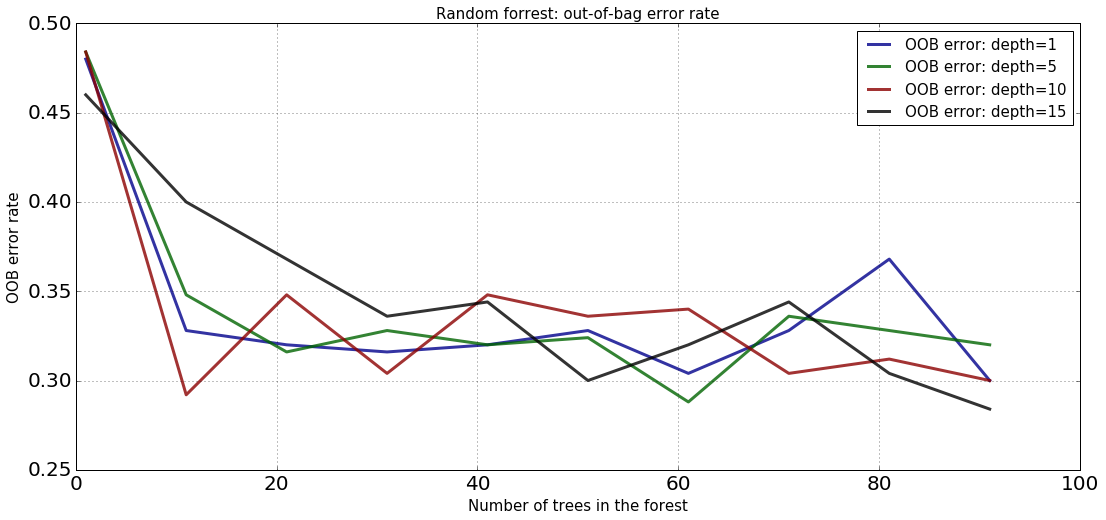

In [59]:
plt.figure(figsize=(18, 8))
plt.plot(n_trees, 1 - oob_scores[:, 0], label='OOB error: depth=1', color="darkblue", alpha=0.8, linewidth=3)
plt.plot(n_trees, 1 - oob_scores[:, 3], label='OOB error: depth=5', color="darkgreen", alpha=0.8, linewidth=3)
plt.plot(n_trees, 1 - oob_scores[:, 5], label='OOB error: depth=10', color="darkred", alpha=0.8, linewidth=3)
plt.plot(n_trees, 1 - oob_scores[:, 14], label='OOB error: depth=15', color="black", alpha=0.8, linewidth=3)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of trees in the forest', fontsize=15)
plt.ylabel('OOB error rate', fontsize=15)
plt.title("Random forrest: out-of-bag error rate", fontsize=15)
plt.grid()


The OOB error rate seams to stabilize around 30 trees. The next step is to plot the test error rate.

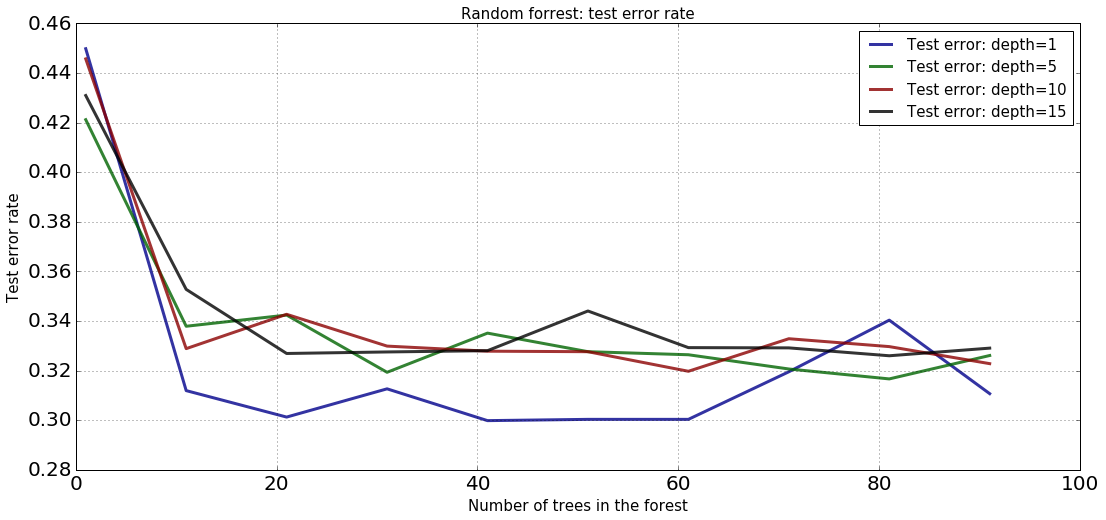

In [60]:
plt.figure(figsize=(18, 8))
plt.plot(n_trees, 1 - test_scores[:, 0], label='Test error: depth=1', color="darkblue", alpha=0.8, linewidth=3)
plt.plot(n_trees, 1 - test_scores[:, 3], label='Test error: depth=5', color="darkgreen", alpha=0.8, linewidth=3)
plt.plot(n_trees, 1 - test_scores[:, 5], label='Test error: depth=10', color="darkred", alpha=0.8, linewidth=3)
plt.plot(n_trees, 1 - test_scores[:, 14], label='Test error: depth=15', color="black", alpha=0.8, linewidth=3)
plt.legend(loc='upper right', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of trees in the forest', fontsize=15)
plt.ylabel('Test error rate', fontsize=15)
plt.title("Random forrest: test error rate", fontsize=15)
plt.grid()


The test error rate seams to be lowest with smaller trees in the forrest. The test error rate seams to stabilize at around 20. In order to find the best parameter combination a grid search can be conducted.

## Step 5: Parameter optimization (grid search)

In [65]:
# Random forest classifier (n=20)
clf = RandomForestClassifier(n_estimators=20)

# Define grid
param_grid = {"max_depth": max_depth,
              "n_estimators": n_trees}

# Conduct analysis
grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
print 'The optimal parameter combination is:', grid_search.best_params_

The optimal parameter combination is: {'n_estimators': 71, 'max_depth': 2}


## Step 6: Build final model

Next we're building the model with the optimal parameters.

In [67]:
# Fit a new model with the above parameters
clfRF_2 = RandomForestClassifier(n_estimators=71, max_depth=2, oob_score=True)
clfRF_2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=71, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

## Step 7: Evaluation

In [68]:
print 'Random classifier: ', random_score
print 'Majority vote: ', majority_score
print 'Random forest: ', clfRF_2.score(x_test, y_test)

Random classifier:  0.500904301202
Majority vote:  0.588983485486
Random forest:  0.66847881834


The random classifier is no better that chance, i.e., it has an accuracy of 50%. The majority vote classifier improves on the accuracy with a score of 59%. The best score is reached with the random forest which achives a score of 67%.

In [69]:
# Extract importance list
importance_list = clfRF_2.feature_importances_
name_list = train_predictors.columns

# Remove values with zero
name_list = name_list[importance_list > 0]
importance_list = importance_list[importance_list > 0]

# Add together
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))


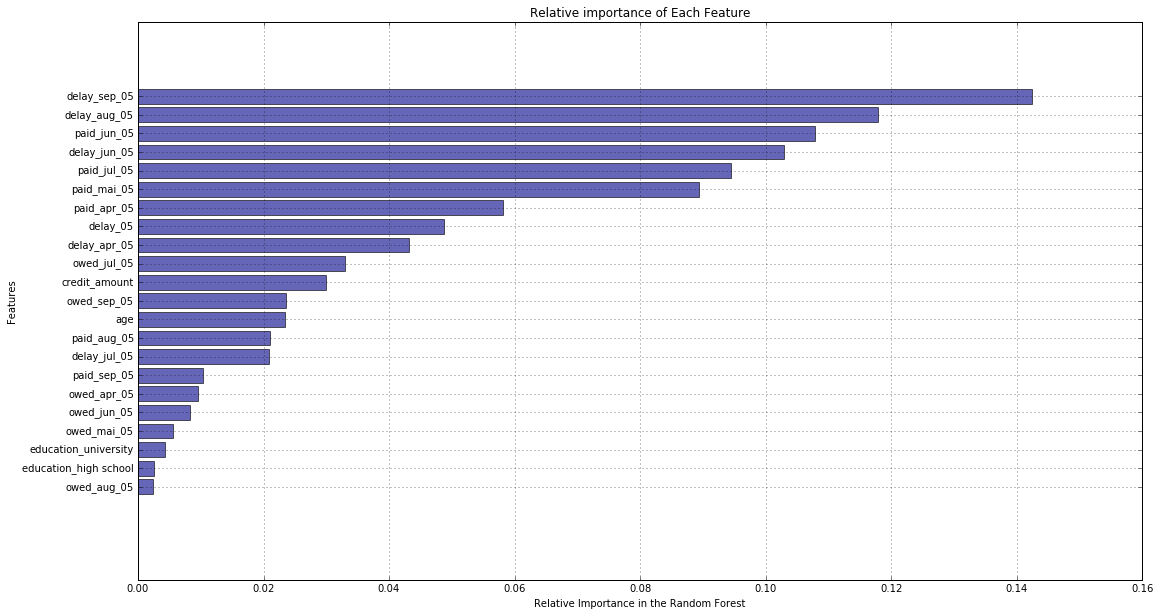

In [70]:
plt.figure(figsize=(18, 10))
plt.barh(range(len(name_list)),importance_list,align='center', color = "darkblue", alpha = 0.6)
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.grid()
plt.show()


Looking at the variable importance graph of the best model (random forest), it appears that the most important feature are the delaiyed and paid variables. In the middle are credit_amount and age while education is found at the bottom.

## Challenge Problem: Boosting for Classification

We've seen in class that boosting is a useful ensemble method to combine a collection of simple regression trees into a powerful regression model. Chapter 10.1 of the text book ([*J.H. Friedman, R. Tibshirani, and T. Hastie, "The Elements of Statistical Learning"*](http://statweb.stanford.edu/~tibs/ElemStatLearn/)) describes the boosting technique for classification trees. Implement the method from scratch.
    
Write a function `fit_and_score_boosted_trees` satisfying:
- Input:
    - `x_train`:  Array of predictors in training set
    - `y_train`:  Array of binary responses in training set
    - `x_test`:  Array of predictors in training set
    - `y_test`:  Array of binary responses in training set
    - `M`:  Number of iterations / Number of decision trees in the ensemble
    - `depth`:  Depth of each decision tree
- Fits an ensemble of `T` decision trees to the training set
- Output:
    - `test_accuracy`:  classification accuracy of the ensemble on the test set

Your function will also have to **standardise** the predictors in the training and test sets before applying boosting.
   
**Hints:** 
- `sklearn`'s decision tree learning routine has an option to specific weights on the training points
- `sklearn`'s classifiers make predictions in {0,1} while the book assumes predictions in {-1, 1}

Your implementation will be evaluated based on three test cases: 

`challenge_testcase_1_train.txt`, `challenge_testcase_1_test.txt`

`challenge_testcase_2_train.txt`, `challenge_testcase_2_test.txt`

`challenge_testcase_3_train.txt`, `challenge_testcase_3_test.txt`

These cases represent extreme examples of data (each dataset contains a particular type of pathology) that might break an implementaiton that is not carefully thought through. 

**Run the code given below to test your implementation. Call `test_implementation` and pass it your function `fit_and_score_boosted_trees`.**

### Functions

In [54]:
#--------  test_implementation
# A function that tests your fit_and_score_boosted_trees function using three test sets.
# Input: 
#      fit_and_score_boosted_trees (your implementation of the boosting function)
# Returns: 
#      None

def test_implementation(fit_and_score_boosted_trees):
    
    # Iterate over test cases
    for i in range(1,4):
        # Load train & test data
        data_train = np.loadtxt('datasets/challenge_testcase_' + str(i) + '_train.txt', delimiter=',')
        data_test = np.loadtxt('datasets/challenge_testcase_' + str(i) + '_test.txt', delimiter=',')

        # Split label and instances
        y_train = data_train[:,-1]
        x_train = data_train[:,0:-1]

        y_test = data_test[:,-1]
        x_test = data_test[:,0:-1]

        # Run boosting function
        print 'Test case', i, ':', fit_and_score_boosted_trees(x_train, y_train, x_test, y_test, 10, 2)    

In [55]:
#--------  fit_and_score_boosted_trees
# A function that fits an ensemble of `T` decision trees to the training set.
# Input: 
#      x_train  (Array of predictors in training set)
#      y_train  (Array of binary responses in training set)
#      x_test   (Array of predictors in training set)
#       y_test  (Array of binary responses in training set)
#       M       (Number of iterations / Number of decision trees in the ensemble)
#      depth    (Depth of each decision tree)
# Returns: 
#      test_accuracy (classification accuracy of the ensemble on the test set)

def fit_and_score_boosted_trees(x_train, y_train, x_test, y_test, M, depth):
    
    # Setup
    trees = []
    alphas = []
    n_length = len(y_train)                        # Length of the training set
    class_var = np.unique(y_train)                 # Class of the output variable
    weight = np.array([1.0 / n_length] * n_length) # Weight

    # Scaling 
    x_train = preprocessing.scale(x_train)
    x_test = preprocessing.scale(x_test)
        
    # Format response [-1, 1]
    y_test = np.array([-1 if (y ==class_var[1]) else 1 for y in y_test])
    y_train = np.array([-1 if (y ==class_var[1]) else 1 for y in y_train])
    
    # Loop through the number of trees 
    for i in range(M):
        
        # Fitting
        ct = DecisionTreeClassifier(max_depth=depth)
        ct.fit(x_train, y_train, weight)    
        
        # Prediction
        y_predict_train = ct.predict(x_train)
        error_y = y_train != y_predict_train
        
        # Calculate alpha and error
        error = np.sum(weight[error_y]) / float(np.sum(weight))
        alpha = (np.log((1 - error) / float(error)))
        
        # Updating weight        
        weight[error_y] = weight[error_y] * np.exp(alpha)
        
        # Append outputs
        trees.append(ct)
        alphas.append(alpha)

    y_predict_test = np.zeros((len(y_test)))
    
    # Loop for test prediction
    for index, ct in enumerate(trees):
        y_predict_test += alphas[index] * ct.predict(x_test)
    
    # Use sign as prediction
    y_sign = np.sign(y_predict_test)
    
    # Calculate accuracy
    test_accuracy = np.mean(y_sign == y_test)
    return test_accuracy

In [71]:
#--------  ada_boost
# A wrapper function around ada boost from sklearn
# Input: 
#      x_train  (Array of predictors in training set)
#      y_train  (Array of binary responses in training set)
#      x_test   (Array of predictors in training set)
#       y_test  (Array of binary responses in training set)
#       M       (Number of iterations / Number of decision trees in the ensemble)
#      depth    (Depth of each decision tree)
# Returns: 
#      test_accuracy (classification accuracy of the ensemble on the test set)

def ada_boost(x_train, y_train, x_test, y_test, M, depth):
    
    # Modelling
    clf = ensemble.AdaBoostClassifier(n_estimators=M)
    clf.fit(x_train, y_train)
    
    # Calculate score
    test_accuracy = clf.score(x_test, y_test)
    return test_accuracy

In [83]:
print 'Own implementation'
test_implementation(fit_and_score_boosted_trees)
print 'ADAboost (sklearn)'
test_implementation(ada_boost)


Own implementation
Test case 1 : 0.652307692308
Test case 2 : 0.653025641026
Test case 3 : 0.652307692308
ADAboost (sklearn)
Test case 1 : 0.642256410256
Test case 2 : 0.667692307692
Test case 3 : 0.642256410256


As a test if the implementation performs correctly a comparison with ADAboost can be done. It appears that the implementation works correclty as both models perform equaly well on the dataset.  